In [ ]:
#!pip install sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_distances
import numpy
from sklearn.metrics import f1_score,precision_score,recall_score

In [ ]:
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

## **1) Installations and imports**


a. Mount drive (if you are running on colab)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


b. Clone or update competition repository
After cloning, under MyDrive, you will see NLI4CT-semeval-2023 folder with the training and dev set, aswell as the full list of CTRs.

In [ ]:
import os

PROJECT_DIR = '/content/drive/MyDrive/NLP'

##**2) Dataset and Preprocessing**

In [ ]:
# Training data
#!unzip /content/drive/MyDrive/Task-2-SemEval-2024/training_data.zip

In [ ]:
 # Dev set
import json
import pandas as pd

dev_path = "/content/drive/MyDrive/NLP/training_data/dev.json"


In [ ]:
#TRAIN SET

train_path = "/content/drive/MyDrive/NLP/training_data/train.json"


In [ ]:
with open(dev_path, 'r') as f:
  test = json.load(f)
with open(train_path, 'r') as f:
  data = json.load(f)
train_keys = set(sorted(data.keys())[:1500])
train = {k: v for k, v in data.items() if k in train_keys}
valid = {k: v for k, v in data.items() if k not in train_keys}

In [ ]:
df_train = pd.DataFrame.from_dict(train, orient='index')

In [ ]:
df_train.head()

,Type,Section_id,Primary_id,Secondary_id,Statement,Label
5bc844fc-e852-4270-bfaf-36ea9eface3d,Comparison,Intervention,NCT01928186,NCT00684983,All the primary trial participants do not rece...,Contradiction
86b7cb3d-6186-4a04-9aa6-b174ab764eed,Single,Eligibility,NCT00662129,NaN,"Patients with Platelet count over 100,000/mm¬¨...",Contradiction
dbed5471-c2fc-45b5-b26f-430c9fa37a37,Comparison,Adverse Events,NCT00093145,NCT00703326,Heart-related adverse events were recorded in ...,Entailment
20c35c89-8d23-4be3-b603-ac0ee0f3b4de,Single,Eligibility,NCT01097642,NaN,Adult Patients with histologic confirmation of...,Contradiction
96b77cdd-aa9f-4770-8447-8a04d9ca5da7,Single,Eligibility,NCT00633750,NaN,Patients with Clinical stage II (T2 N1) invasi...,Contradiction


In [ ]:
df_valid = pd.DataFrame.from_dict(valid, orient='index')

In [ ]:
df_valid.head()

,Type,Section_id,Primary_id,Secondary_id,Statement,Label
f17cb242-419d-4f5d-bfa4-41494ed5ac0e,Comparison,Intervention,NCT00852930,NCT02308020,Laser Therapy is in each cohort of the primary...,Contradiction
fc5c4554-7ce9-4c16-b374-a3cd9d15b021,Comparison,Eligibility,NCT00971945,NCT01027416,Patients must have already participated in a s...,Contradiction
f79a9011-0a68-4255-a40f-5d73af412bf0,Comparison,Intervention,NCT01425268,NCT01373671,CO2 is utilised as part of the intervention in...,Entailment
fa530b28-9142-49f2-aa80-4d04fa532910,Single,Intervention,NCT03765996,NaN,Participants in group 2 of the primary trial r...,Contradiction
f8028143-35d1-4cc3-895a-acb577db4715,Comparison,Intervention,NCT00537771,NCT00354640,participants of cohort 1 in the primary trial ...,Contradiction


In [ ]:
df_test = pd.DataFrame.from_dict(test, orient='index')

In [ ]:
len(df_train)

1500

In [ ]:
len(df_valid)

200

In [ ]:
#df=df.transpose()

In [ ]:
df_train = df_train.reset_index(drop=True)
df_valid = df_valid.reset_index(drop=True)
df_test = df_valid.reset_index(drop=True)

In [ ]:
df_train.head()

,Type,Section_id,Primary_id,Secondary_id,Statement,Label
0,Comparison,Intervention,NCT01928186,NCT00684983,All the primary trial participants do not rece...,Contradiction
1,Single,Eligibility,NCT00662129,NaN,"Patients with Platelet count over 100,000/mm¬¨...",Contradiction
2,Comparison,Adverse Events,NCT00093145,NCT00703326,Heart-related adverse events were recorded in ...,Entailment
3,Single,Eligibility,NCT01097642,NaN,Adult Patients with histologic confirmation of...,Contradiction
4,Single,Eligibility,NCT00633750,NaN,Patients with Clinical stage II (T2 N1) invasi...,Contradiction


In [ ]:
df_train.describe()

,Type,Section_id,Primary_id,Secondary_id,Statement,Label
count,1500,1500,1500,579,1500,1500
unique,2,4,837,340,1492,2
top,Single,Adverse Events,NCT01827787,NCT01926886,Patients with E2 outside the premenopausal ran...,Entailment
freq,921,438,2,2,2,752


In [ ]:
df_train.isnull().sum()

Type              0
Section_id        0
Primary_id        0
Secondary_id    921
Statement         0
Label             0
dtype: int64

In [ ]:
(df_train[df_train['Type']=='Single']).count()

Type            921
Section_id      921
Primary_id      921
Secondary_id      0
Statement       921
Label           921
dtype: int64

In [ ]:
(df_train[df_train['Label']=='Contradiction']).count()

Type            748
Section_id      748
Primary_id      748
Secondary_id    300
Statement       748
Label           748
dtype: int64

In [ ]:
(df_train[df_train['Label']=='Entailment']).count()

Type            752
Section_id      752
Primary_id      752
Secondary_id    279
Statement       752
Label           752
dtype: int64

In [ ]:
(df_train[df_train['Label']=='Contradiction']).describe()

,Type,Section_id,Primary_id,Secondary_id,Statement,Label
count,748,748,748,300,748,748
unique,2,4,748,300,748,1
top,Single,Adverse Events,NCT01928186,NCT00684983,All the primary trial participants do not rece...,Contradiction
freq,448,222,1,1,1,748


In [ ]:
(df_train[df_train['Label']=='Entailment']).describe()

,Type,Section_id,Primary_id,Secondary_id,Statement,Label
count,752,752,752,279,752,752
unique,2,4,752,279,752,1
top,Single,Eligibility,NCT00093145,NCT00703326,Heart-related adverse events were recorded in ...,Entailment
freq,473,222,1,1,1,752


Visualization

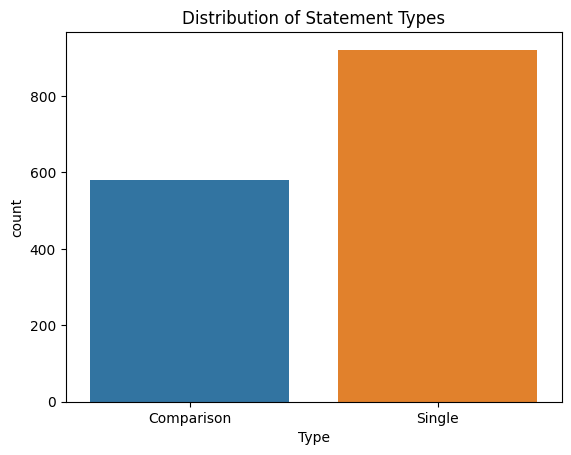

In [ ]:
# understand distribution of statement types (Single, Comparison)

# result: 140 Single, 60 Comparison
# ratio: 2.33 : 1

sns.countplot(x='Type', data=df_train)
plt.title('Distribution of Statement Types')
plt.show()

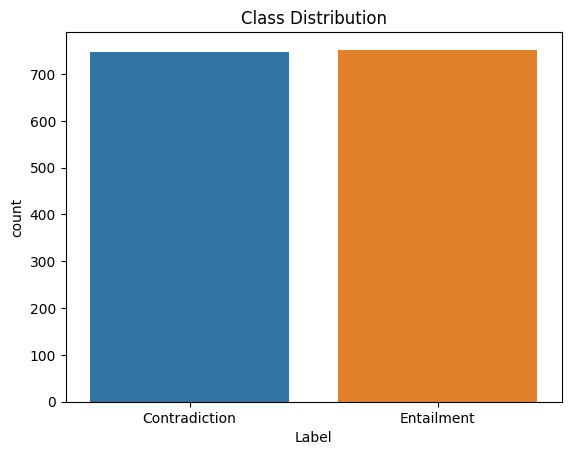

In [ ]:
# check for class imbalance in the target labels (entailment, contradiction)

# result: no class imbalance
# ratio: 1 : 1

sns.countplot(x='Label', data=df_train)
plt.title('Class Distribution')
plt.show()

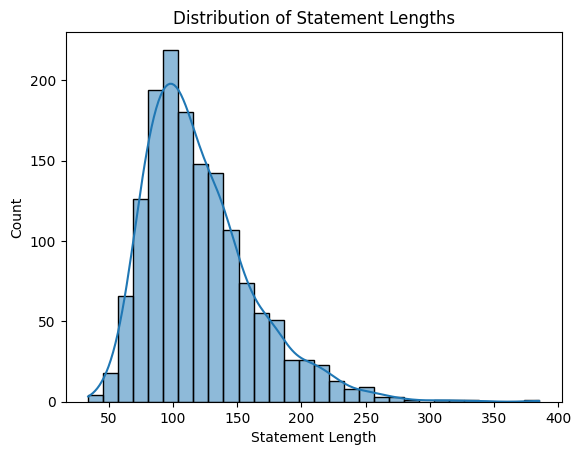

In [ ]:
# investigate the length distribution of statements

# result: most statements length between ca. 60 - 140

# questions:
# what about very short outliers ( < 60) ?
# what about very long outliers ( > 140) ?

sns.histplot(df_train['Statement'].apply(len), bins=30, kde=True)
plt.title('Distribution of Statement Lengths')
plt.xlabel('Statement Length')
plt.show()

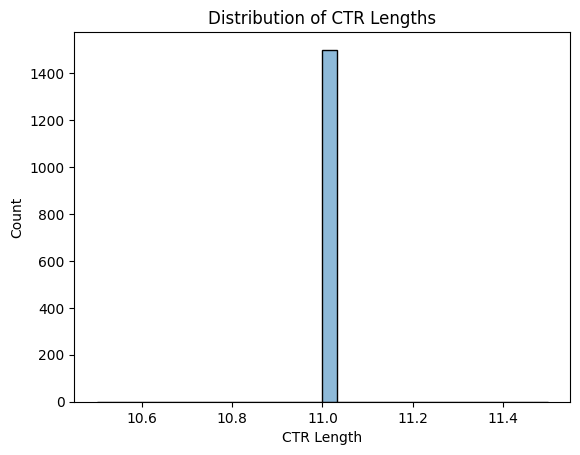

In [ ]:
# examine the distribution of clinical trial reports (CTR) lengths

# result: CTRs are of uniform format


sns.histplot(df_train['Primary_id'].apply(lambda x: len(x)), bins=30, kde=True)
plt.title('Distribution of CTR Lengths')
plt.xlabel('CTR Length')
plt.show()

In [ ]:
# examine the distribution of section lengths in the CTRs

con_intervention = 0
con_adverse = 0
con_eligibility = 0
con_results = 0

ent_intervention = 0
ent_adverse = 0
ent_eligibility = 0
ent_results = 0

for index, row in df_train.iterrows():
    if row["Label"] == "Contradiction":
        if row["Section_id"] == "Intervention":
            con_intervention += 1
        elif row["Section_id"] == "Adverse Events":
            con_adverse += 1
        elif row["Section_id"] == "Eligibility":
            con_eligibility += 1
        elif row["Section_id"] == "Results":
            con_results += 1
    elif row["Label"] == "Entailment":
        if row["Section_id"] == "Intervention":
            ent_intervention += 1
        elif row["Section_id"] == "Adverse Events":
            ent_adverse += 1
        elif row["Section_id"] == "Eligibility":
            ent_eligibility += 1
        elif row["Section_id"] == "Results":
            ent_results += 1

print(con_intervention)
print(con_adverse)
print(con_eligibility)
print(con_results)
print(ent_intervention)
print(ent_adverse)
print(ent_eligibility)
print(ent_results)

173
222
211
142
172
216
222
142


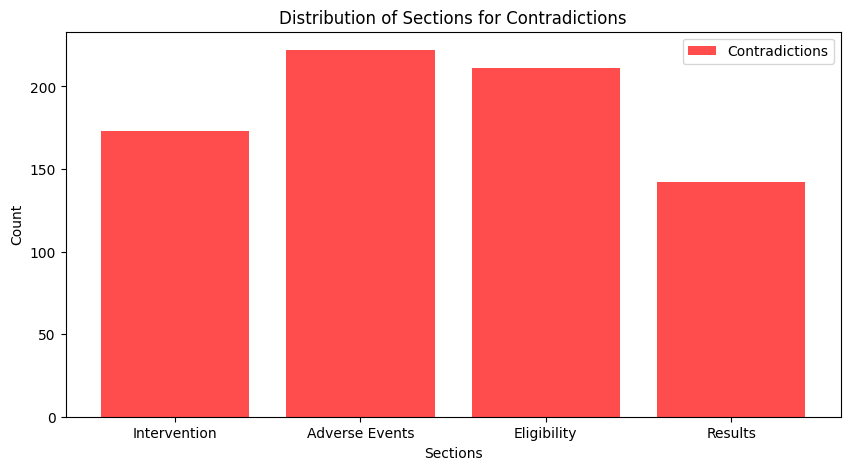

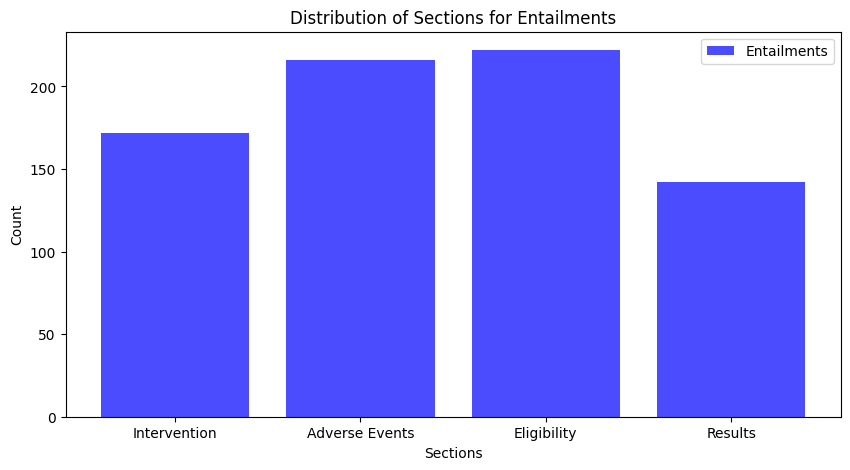

In [ ]:
# Data for Contradictions
con_labels = ['Intervention', 'Adverse Events', 'Eligibility', 'Results']
con_counts = [con_intervention, con_adverse, con_eligibility, con_results]

# Data for Entailments
ent_labels = ['Intervention', 'Adverse Events', 'Eligibility', 'Results']
ent_counts = [ent_intervention, ent_adverse, ent_eligibility, ent_results]

# Plotting Contradictions
plt.figure(figsize=(10, 5))
plt.bar(con_labels, con_counts, color='red', alpha=0.7, label='Contradictions')
plt.xlabel('Sections')
plt.ylabel('Count')
plt.title('Distribution of Sections for Contradictions')
plt.legend()
plt.show()

# Plotting Entailments
plt.figure(figsize=(10, 5))
plt.bar(ent_labels, ent_counts, color='blue', alpha=0.7, label='Entailments')
plt.xlabel('Sections')
plt.ylabel('Count')
plt.title('Distribution of Sections for Entailments')
plt.legend()
plt.show()

In [ ]:
"""
Findings:

1. The number of instances for "Contradiction" and "Entailment" labels in each section appears to be relatively balanced.

2. The sections "Adverse Events" and "Eligibility" have higher counts compared to "Intervention" and "Results" for both labels.

3. "Adverse Events" and "Eligibility" have higher counts under "Contradiction" than under "Entailment," suggesting these sections
may be more associated with contradictions in the dataset.

4. "Intervention" and "Results" have similar counts under both "Contradiction" and "Entailment."

Conclusion:


The provided counts for different sections under "Contradiction" and "Entailment" labels do not show a consistent pattern or strong association.
No section appears to significantly correlate with either label. Given the lack of clear trends, a detailed analysis focusing on these
section-label relationships seems unnecessary.

"""

'\nFindings:\n\n1. The number of instances for "Contradiction" and "Entailment" labels in each section appears to be relatively balanced.\n\n2. The sections "Adverse Events" and "Eligibility" have higher counts compared to "Intervention" and "Results" for both labels.\n\n3. "Adverse Events" and "Eligibility" have higher counts under "Contradiction" than under "Entailment," suggesting these sections\nmay be more associated with contradictions in the dataset.\n\n4. "Intervention" and "Results" have similar counts under both "Contradiction" and "Entailment."\n\nConclusion:\n\n\nThe provided counts for different sections under "Contradiction" and "Entailment" labels do not show a consistent pattern or strong association.\nNo section appears to significantly correlate with either label. Given the lack of clear trends, a detailed analysis focusing on these\nsection-label relationships seems unnecessary.\n\n'

In [ ]:
df_train.head()

,Type,Section_id,Primary_id,Secondary_id,Statement,Label
0,Comparison,Intervention,NCT01928186,NCT00684983,All the primary trial participants do not rece...,Contradiction
1,Single,Eligibility,NCT00662129,NaN,"Patients with Platelet count over 100,000/mm¬¨...",Contradiction
2,Comparison,Adverse Events,NCT00093145,NCT00703326,Heart-related adverse events were recorded in ...,Entailment
3,Single,Eligibility,NCT01097642,NaN,Adult Patients with histologic confirmation of...,Contradiction
4,Single,Eligibility,NCT00633750,NaN,Patients with Clinical stage II (T2 N1) invasi...,Contradiction


Making the train, val and test dfs


In [ ]:
uuid_list_train = list(train.keys())
uuid_list_val = list(valid.keys())
uuid_list_test = list(test.keys())

In [ ]:
uuid_list_train[0]

'5bc844fc-e852-4270-bfaf-36ea9eface3d'

In [ ]:
len(uuid_list_train)

1500

In [ ]:
list_p_ctr=[]
list_s_ctr=[]

for i in range(len(uuid_list_train)):
  df_ctr_path = os.path.join("/content/drive/MyDrive/NLP/training_data/CT json",train[uuid_list_train[i]]["Primary_id"]+".json")
  #print(df_ctr_path)
  with open(df_ctr_path) as json_file:
    ctr = json.load(json_file)

  if train[uuid_list_train[i]]["Type"] == "Comparison":
    secondary_ctr_path = os.path.join("/content/drive/MyDrive/NLP/training_data/CT json",train[uuid_list_train[i]]["Secondary_id"]+".json")
    with open(secondary_ctr_path) as json_file:
      secondary_ctr = json.load(json_file)
    secondary_section = ctr[train[uuid_list_train[i]]["Section_id"]]
    secondary_section = ' '.join(secondary_section)
  else:
    secondary_section = "None"



  #Retrieve the full section from the primary trial
  #print(train[uuid_list[i]])
  primary_section = ctr[train[uuid_list_train[i]]["Section_id"]]
  primary_section = ' '.join(primary_section)



  #break
  list_p_ctr.append(primary_section)
  list_s_ctr.append(secondary_section)
  #print(primary_section)


In [ ]:
list_p_ctr2=[]
list_s_ctr2=[]

for i in range(len(uuid_list_val)):
  df_ctr_path = os.path.join("/content/drive/MyDrive/NLP/training_data/CT json",valid[uuid_list_val[i]]["Primary_id"]+".json")
  #print(df_ctr_path)
  with open(df_ctr_path) as json_file:
    ctr = json.load(json_file)

  if valid[uuid_list_val[i]]["Type"] == "Comparison":
    secondary_ctr_path = os.path.join("/content/drive/MyDrive/NLP/training_data/CT json",valid[uuid_list_val[i]]["Secondary_id"]+".json")
    with open(secondary_ctr_path) as json_file:
      secondary_ctr = json.load(json_file)
    secondary_section = ctr[valid[uuid_list_val[i]]["Section_id"]]
    secondary_section = ' '.join(secondary_section)
  else:
    secondary_section = "None"



  #Retrieve the full section from the primary trial
  #print(train[uuid_list[i]])
  primary_section = ctr[valid[uuid_list_val[i]]["Section_id"]]
  primary_section = ' '.join(primary_section)



  #break
  list_p_ctr2.append(primary_section)
  list_s_ctr2.append(secondary_section)
  #print(primary_section)

In [ ]:
list_p_ctr3=[]
list_s_ctr3=[]

for i in range(len(uuid_list_test)):
  df_ctr_path = os.path.join("/content/drive/MyDrive/NLP/training_data/CT json",test[uuid_list_test[i]]["Primary_id"]+".json")
  #print(df_ctr_path)
  with open(df_ctr_path) as json_file:
    ctr = json.load(json_file)

  if test[uuid_list_test[i]]["Type"] == "Comparison":
    secondary_ctr_path = os.path.join("/content/drive/MyDrive/NLP/training_data/CT json",test[uuid_list_test[i]]["Secondary_id"]+".json")
    with open(secondary_ctr_path) as json_file:
      secondary_ctr = json.load(json_file)
    secondary_section = ctr[test[uuid_list_test[i]]["Section_id"]]
    secondary_section = ' '.join(secondary_section)
  else:
    secondary_section = "None"



  #Retrieve the full section from the primary trial
  #print(train[uuid_list[i]])
  primary_section = ctr[test[uuid_list_test[i]]["Section_id"]]
  primary_section = ' '.join(primary_section)



  #break
  list_p_ctr3.append(primary_section)
  list_s_ctr3.append(secondary_section)
  #print(primary_section)

In [ ]:
print(len(list_s_ctr))

1500


In [ ]:
new_train_df = df_train[["Statement", "Label"]]

In [ ]:
new_train_df = new_train_df.reset_index(drop=True)

In [ ]:
new_train_df.head()

,Statement,Label
0,All the primary trial participants do not rece...,Contradiction
1,"Patients with Platelet count over 100,000/mm¬¨...",Contradiction
2,Heart-related adverse events were recorded in ...,Entailment
3,Adult Patients with histologic confirmation of...,Contradiction
4,Patients with Clinical stage II (T2 N1) invasi...,Contradiction


In [ ]:
list_p_ctr = numpy.array(list_p_ctr)
list_s_ctr = numpy.array(list_s_ctr)

In [ ]:
new_train_df['Primary CTR'] = list_p_ctr.tolist()

In [ ]:
new_train_df['Secondary CTR'] = list_s_ctr.tolist()

In [ ]:
new_train_df['Type'] = df_train['Type']

In [ ]:
new_train_df.head()

,Statement,Label,Primary CTR,Secondary CTR,Type
0,All the primary trial participants do not rece...,Contradiction,INTERVENTION 1: Diagnostic (FLT PET) Pati...,INTERVENTION 1: Diagnostic (FLT PET) Pati...,Comparison
1,"Patients with Platelet count over 100,000/mm¬¨...",Contradiction,DISEASE CHARACTERISTICS: Histologically or c...,None,Single
2,Heart-related adverse events were recorded in ...,Entailment,Adverse Events 1: Total: 5/32 (15.63%) Feb...,Adverse Events 1: Total: 5/32 (15.63%) Feb...,Comparison
3,Adult Patients with histologic confirmation of...,Contradiction,Inclusion Criteria: Patients with histologic...,None,Single
4,Patients with Clinical stage II (T2 N1) invasi...,Contradiction,Inclusion Criteria: Clinical stage I or II (...,None,Single


In [ ]:
new_val_df = df_valid[["Statement", "Label"]]

In [ ]:
new_val_df = new_val_df.reset_index(drop=True)

In [ ]:
new_val_df.head()

,Statement,Label
0,Laser Therapy is in each cohort of the primary...,Contradiction
1,Patients must have already participated in a s...,Contradiction
2,CO2 is utilised as part of the intervention in...,Entailment
3,Participants in group 2 of the primary trial r...,Contradiction
4,participants of cohort 1 in the primary trial ...,Contradiction


In [ ]:
list_p_ctr2 = numpy.array(list_p_ctr2)
list_s_ctr2 = numpy.array(list_s_ctr2)

In [ ]:
new_val_df['Primary CTR'] = list_p_ctr2.tolist()

In [ ]:
new_val_df['Secondary CTR'] = list_s_ctr2.tolist()

In [ ]:
new_val_df['Type'] = df_valid['Type']

In [ ]:
new_val_df.head()

,Statement,Label,Primary CTR,Secondary CTR,Type
0,Laser Therapy is in each cohort of the primary...,Contradiction,INTERVENTION 1: Laser Therapy Alone thera...,INTERVENTION 1: Laser Therapy Alone thera...,Comparison
1,Patients must have already participated in a s...,Contradiction,Inclusion Criteria: Subjects who were confir...,Inclusion Criteria: Subjects who were confir...,Comparison
2,CO2 is utilised as part of the intervention in...,Entailment,INTERVENTION 1: AeroForm Tissue Expansion ...,INTERVENTION 1: AeroForm Tissue Expansion ...,Comparison
3,Participants in group 2 of the primary trial r...,Contradiction,INTERVENTION 1: Decongestive Physiotherapy ...,None,Single
4,participants of cohort 1 in the primary trial ...,Contradiction,INTERVENTION 1: Arimidex Group Anastrozol...,INTERVENTION 1: Arimidex Group Anastrozol...,Comparison


In [ ]:
print(len(list_s_ctr2))

200


In [ ]:
new_val_df.head()

,Statement,Label,Primary CTR,Secondary CTR,Type
0,Laser Therapy is in each cohort of the primary...,Contradiction,INTERVENTION 1: Laser Therapy Alone thera...,INTERVENTION 1: Laser Therapy Alone thera...,Comparison
1,Patients must have already participated in a s...,Contradiction,Inclusion Criteria: Subjects who were confir...,Inclusion Criteria: Subjects who were confir...,Comparison
2,CO2 is utilised as part of the intervention in...,Entailment,INTERVENTION 1: AeroForm Tissue Expansion ...,INTERVENTION 1: AeroForm Tissue Expansion ...,Comparison
3,Participants in group 2 of the primary trial r...,Contradiction,INTERVENTION 1: Decongestive Physiotherapy ...,None,Single
4,participants of cohort 1 in the primary trial ...,Contradiction,INTERVENTION 1: Arimidex Group Anastrozol...,INTERVENTION 1: Arimidex Group Anastrozol...,Comparison


In [ ]:
new_test_df = df_test[["Statement", "Label"]]

In [ ]:
new_test_df = new_test_df.reset_index(drop=True)

In [ ]:
new_test_df.head()

,Statement,Label
0,Laser Therapy is in each cohort of the primary...,Contradiction
1,Patients must have already participated in a s...,Contradiction
2,CO2 is utilised as part of the intervention in...,Entailment
3,Participants in group 2 of the primary trial r...,Contradiction
4,participants of cohort 1 in the primary trial ...,Contradiction


In [ ]:
list_p_ctr3 = numpy.array(list_p_ctr3)
list_s_ctr3 = numpy.array(list_s_ctr3)

In [ ]:
new_test_df['Primary CTR'] = list_p_ctr3.tolist()

In [ ]:
new_test_df['Secondary CTR'] = list_s_ctr3.tolist()

In [ ]:
new_test_df['Type'] = df_test['Type']

In [ ]:
new_test_df.head()

,Statement,Label,Primary CTR,Secondary CTR,Type
0,Laser Therapy is in each cohort of the primary...,Contradiction,Outcome Measurement: Event-free Survival ...,None,Comparison
1,Patients must have already participated in a s...,Contradiction,Inclusion criteria: Inclusion Criteria: Fema...,Inclusion criteria: Inclusion Criteria: Fema...,Comparison
2,CO2 is utilised as part of the intervention in...,Entailment,Adverse Events 1: Total: 20/167 (11.98%) C...,Adverse Events 1: Total: 20/167 (11.98%) C...,Comparison
3,Participants in group 2 of the primary trial r...,Contradiction,Outcome Measurement: Local Control Using Ip...,None,Single
4,participants of cohort 1 in the primary trial ...,Contradiction,Inclusion Criteria: Postmenopausal women wit...,None,Comparison


In [ ]:
#new_train_df['P_CTR_length'] = new_train_df['Primary CTR'].apply(lambda x: len(word_tokenize(x)))

In [ ]:
#new_train_df['S_CTR_length'] = new_train_df['Secondary CTR'].apply(lambda x: len(word_tokenize(x)) if(x!="None") else 0)

In [ ]:
#new_train_df['Statement_length'] = new_train_df['Statement'].apply(lambda x: len(word_tokenize(x)))

In [ ]:
new_train_df.head()

,Statement,Label,Primary CTR,Secondary CTR,Type
0,All the primary trial participants do not rece...,Contradiction,INTERVENTION 1: Diagnostic (FLT PET) Pati...,INTERVENTION 1: Diagnostic (FLT PET) Pati...,Comparison
1,"Patients with Platelet count over 100,000/mm¬¨...",Contradiction,DISEASE CHARACTERISTICS: Histologically or c...,None,Single
2,Heart-related adverse events were recorded in ...,Entailment,Adverse Events 1: Total: 5/32 (15.63%) Feb...,Adverse Events 1: Total: 5/32 (15.63%) Feb...,Comparison
3,Adult Patients with histologic confirmation of...,Contradiction,Inclusion Criteria: Patients with histologic...,None,Single
4,Patients with Clinical stage II (T2 N1) invasi...,Contradiction,Inclusion Criteria: Clinical stage I or II (...,None,Single


In [ ]:
new_val_df['P_CTR_length'] = new_val_df['Primary CTR'].apply(lambda x: len(word_tokenize(x)))

In [ ]:
new_val_df['S_CTR_length'] = new_val_df['Secondary CTR'].apply(lambda x: len(word_tokenize(x)) if(x!="None") else 0)

In [ ]:
new_val_df['Statement_length'] = new_val_df['Statement'].apply(lambda x: len(word_tokenize(x)))

In [ ]:
new_val_df.head()

,Statement,Label,Primary CTR,Secondary CTR,Type,P_CTR_length,S_CTR_length,Statement_length
0,Laser Therapy is in each cohort of the primary...,Contradiction,INTERVENTION 1: Laser Therapy Alone thera...,INTERVENTION 1: Laser Therapy Alone thera...,Comparison,33,33,20
1,Patients must have already participated in a s...,Contradiction,Inclusion Criteria: Subjects who were confir...,Inclusion Criteria: Subjects who were confir...,Comparison,56,56,21
2,CO2 is utilised as part of the intervention in...,Entailment,INTERVENTION 1: AeroForm Tissue Expansion ...,INTERVENTION 1: AeroForm Tissue Expansion ...,Comparison,106,106,35
3,Participants in group 2 of the primary trial r...,Contradiction,INTERVENTION 1: Decongestive Physiotherapy ...,None,Single,273,0,20
4,participants of cohort 1 in the primary trial ...,Contradiction,INTERVENTION 1: Arimidex Group Anastrozol...,INTERVENTION 1: Arimidex Group Anastrozol...,Comparison,29,29,28


In [ ]:
new_test_df['P_CTR_length'] = new_test_df['Primary CTR'].apply(lambda x: len(word_tokenize(x)))

In [ ]:
new_test_df['S_CTR_length'] = new_test_df['Secondary CTR'].apply(lambda x: len(word_tokenize(x)) if(x!="None") else 0)

In [ ]:
new_test_df['Statement_length'] = new_test_df['Statement'].apply(lambda x: len(word_tokenize(x)))

In [ ]:
new_test_df.head()

,Statement,Label,Primary CTR,Secondary CTR,Type,P_CTR_length,S_CTR_length,Statement_length
0,Laser Therapy is in each cohort of the primary...,Contradiction,Outcome Measurement: Event-free Survival ...,None,Comparison,153,0,20
1,Patients must have already participated in a s...,Contradiction,Inclusion criteria: Inclusion Criteria: Fema...,Inclusion criteria: Inclusion Criteria: Fema...,Comparison,319,319,21
2,CO2 is utilised as part of the intervention in...,Entailment,Adverse Events 1: Total: 20/167 (11.98%) C...,Adverse Events 1: Total: 20/167 (11.98%) C...,Comparison,170,170,35
3,Participants in group 2 of the primary trial r...,Contradiction,Outcome Measurement: Local Control Using Ip...,None,Single,97,0,20
4,participants of cohort 1 in the primary trial ...,Contradiction,Inclusion Criteria: Postmenopausal women wit...,None,Comparison,447,0,28


In [ ]:
# Explore word combinations with entailment and contradiction labels
entailment_data = new_train_df[new_train_df['Label'] == 'Entailment']
contradiction_data = new_train_df[new_train_df['Label'] == 'Contradiction']

In [ ]:
def get_top_words_with_label(data_subset):
    vectorizer = CountVectorizer(tokenizer=word_tokenize)
    X = vectorizer.fit_transform(data_subset)
    word_freq = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
    top_words = word_freq.sum().sort_values(ascending=False).head(10)
    return top_words

top_words_entailment = get_top_words_with_label(entailment_data['Statement'])
top_words_contradiction = get_top_words_with_label(contradiction_data['Statement'])

print("Top words in combination with entailment label:")
print(top_words_entailment)
print("\nTop words in combination with contradiction label:")
print(top_words_contradiction)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Top words in combination with entailment label:
the          1372
trial        1038
primary       754
.             739
of            596
in            517
,             377
patients      300
secondary     284
and           258
dtype: int64

Top words in combination with contradiction label:
the          1408
trial        1052
primary       749
.             740
of            606
in            539
,             449
patients      334
and           314
secondary     304
dtype: int64


Preprocess

In [ ]:
# downlaod relevant libraries and functions for data preparation

from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import nltk
import re
from nltk.stem import WordNetLemmatizer


In [ ]:
# download NLTK resources

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
stop_words = set(stopwords.words('english'))
porter = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Custom stop words including percentage sign and other symbols relevant to your domain
custom_stop_words = set(stopwords.words('english')) - {'%', ',', '-', '(', ')', 'with', 'from', 'if', 'but', 'still', 'for', 'or', 'over', 'not', 'if'}

def preprocess_text(text):
    text = re.sub(r'\s+', ' ', str(text))  # replace multiple whitespaces with a single space # PROBLEM: Keep punctuation and %
    tokens = word_tokenize(text)  # tokenize and lowercase # PROBLEM: lowercase also not very helpful
    tokens = [word for word in tokens if word not in custom_stop_words] # remove stop words
    tokens = [porter.stem(word) for word in tokens] #stemming
    tokens = [lemmatizer.lemmatize(word) for word in tokens] #lemmatization

    return " ".join(tokens)

In [ ]:
new_train_df.head()

,Statement,Label,Primary CTR,Secondary CTR,Type
0,All the primary trial participants do not rece...,Contradiction,INTERVENTION 1: Diagnostic (FLT PET) Pati...,INTERVENTION 1: Diagnostic (FLT PET) Pati...,Comparison
1,"Patients with Platelet count over 100,000/mm¬¨...",Contradiction,DISEASE CHARACTERISTICS: Histologically or c...,None,Single
2,Heart-related adverse events were recorded in ...,Entailment,Adverse Events 1: Total: 5/32 (15.63%) Feb...,Adverse Events 1: Total: 5/32 (15.63%) Feb...,Comparison
3,Adult Patients with histologic confirmation of...,Contradiction,Inclusion Criteria: Patients with histologic...,None,Single
4,Patients with Clinical stage II (T2 N1) invasi...,Contradiction,Inclusion Criteria: Clinical stage I or II (...,None,Single


In [ ]:
new_train_df.to_csv("new_train_df.csv")

In [ ]:

new_test_df.iloc[0]

Statement           Laser Therapy is in each cohort of the primary...
Label                                                   Contradiction
Primary CTR         Outcome Measurement:    Event-free Survival   ...
Secondary CTR                                                    None
Type                                                       Comparison
P_CTR_length                                                      153
S_CTR_length                                                        0
Statement_length                                                   20
Name: 0, dtype: object

# **3) Main Code for Model**

In [ ]:
from torch.utils.data import Dataset
from transformers import BertTokenizer
import pandas as pd
from transformers import BertTokenizer
import torch
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim
import torch.nn.functional as F
import torch
from torch.utils.data import Dataset
from transformers import BertTokenizer

In [ ]:


class CustomDataset(Dataset):
    def __init__(self, dataframe, tokenizer, max_length , num_classes):
        self.data = dataframe
        self.tokenizer = tokenizer
        self.max_length = max_length
        self.num_classes = num_classes

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        statement = str(self.data['Statement'][index])
        label = self.data['Label'][index]

        #convert labels to numerical values
        label_dict = {'Contradiction': 0, 'Entailment': 1}
        label_id = label_dict.get(label, -1)


        if label_id == -1:
            raise ValueError(f"Label '{label}' not found in label dictionary")


        encoding = self.tokenizer(
            statement,
            truncation=True,
            padding='max_length',
            max_length=self.max_length,
            return_tensors='pt'
        )

        input_ids = encoding['input_ids'].flatten()
        attention_mask = encoding['attention_mask'].flatten()


        label_tensor = torch.zeros(self.num_classes)
        label_tensor[label_id] = 1

        return {
            'input_ids': input_ids,
            'attention_mask': attention_mask,
            'label': label_tensor.long()

        }




In [ ]:
# Load BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

max_length = 512

batch_size = 32

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
# Create an instance of the CustomDataset class for train, val and test, and put all of them in dataloaders
train_dataset = CustomDataset(new_train_df, tokenizer, max_length , num_classes = 2)
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

val_dataset = CustomDataset(new_val_df, tokenizer, max_length , num_classes = 2)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=True)

test_dataset = CustomDataset(new_test_df, tokenizer, max_length , num_classes = 2)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

In [ ]:
import torch
import torch.nn as nn


class SelfAttention(nn.Module):
    def __init__(self, embed_size, heads):
        super(SelfAttention, self).__init__()
        self.embed_size = embed_size
        self.heads = heads
        self.head_dim = embed_size // heads

        assert (
            self.head_dim * heads == embed_size
        ), "Embedding size needs to be divisible by heads"

        self.values = nn.Linear(embed_size, embed_size)
        self.keys = nn.Linear(embed_size, embed_size)
        self.queries = nn.Linear(embed_size, embed_size)
        self.fc_out = nn.Linear(embed_size, embed_size)

    def forward(self, values, keys, query, mask):
        # Get number of training examples
        N = query.shape[0]

        value_len, key_len, query_len = values.shape[1], keys.shape[1], query.shape[1]

        values = self.values(values)  # (N, value_len, embed_size)
        keys = self.keys(keys)  # (N, key_len, embed_size)
        queries = self.queries(query)  # (N, query_len, embed_size)

        # Split the embedding into self.heads different pieces
        values = values.reshape(N, value_len, self.heads, self.head_dim)
        keys = keys.reshape(N, key_len, self.heads, self.head_dim)
        queries = queries.reshape(N, query_len, self.heads, self.head_dim)

        energy = torch.einsum("nqhd,nkhd->nhqk", [queries, keys])

        if mask is not None:
            energy = energy.masked_fill(mask == 0, float("-1e20"))

        attention = torch.softmax(energy / (self.embed_size ** (1 / 2)), dim=3)


        out = torch.einsum("nhql,nlhd->nqhd", [attention, values]).reshape(
            N, query_len, self.heads * self.head_dim
        )

        out = self.fc_out(out)

        return out



In [ ]:

class TransformerBlock(nn.Module):
    def __init__(self, embed_size, heads, dropout, forward_expansion):
        super(TransformerBlock, self).__init__()
        self.attention = SelfAttention(embed_size, heads)
        self.norm1 = nn.LayerNorm(embed_size)
        self.norm2 = nn.LayerNorm(embed_size)

        self.feed_forward = nn.Sequential(
            nn.Linear(embed_size, forward_expansion * embed_size),
            nn.ReLU(),
            nn.Linear(forward_expansion * embed_size, embed_size),
        )

        self.dropout = nn.Dropout(dropout)

    def forward(self, value, key, query, mask):
        attention = self.attention(value, key, query, mask)

        # Add skip connection, run through normalization and finally dropout
        x = self.dropout(self.norm1(attention + query))
        forward = self.feed_forward(x)
        out = self.dropout(self.norm2(forward + x))
        return out



In [ ]:

class Encoder(nn.Module):
    def __init__(
        self,
        src_vocab_size,
        embed_size,
        num_layers,
        heads,
        device,
        forward_expansion,
        dropout,
        max_length,
    ):

        super(Encoder, self).__init__()
        self.embed_size = embed_size
        self.device = device
        self.word_embedding = nn.Embedding(src_vocab_size, embed_size)
        self.position_embedding = nn.Embedding(max_length, embed_size)

        self.layers = nn.ModuleList(
            [
                TransformerBlock(
                    embed_size,
                    heads,
                    dropout=dropout,
                    forward_expansion=forward_expansion,
                )
                for _ in range(num_layers)
            ]
        )

        self.dropout = nn.Dropout(dropout)

    def forward(self, x, mask):
        N, seq_length = x.shape
        positions = torch.arange(0, seq_length).expand(N, seq_length).to(self.device)
        out = self.dropout(
            (self.word_embedding(x) + self.position_embedding(positions))
        )
        for layer in self.layers:
            out = layer(out, out, out, mask)

        return out






In [ ]:
embed_size = 512
num_layers = 6
forward_expansion = 4
heads = 8
dropout = 0
max_length = 512
num_classes = 2

In [ ]:
class EncoderTransformer(nn.Module):
    def __init__(self, src_vocab_size, src_pad_idx, embed_size, num_layers, forward_expansion, heads, dropout, max_length, num_classes, device="cpu"):
        super(EncoderTransformer, self).__init__()
        self.encoder = Encoder(src_vocab_size, embed_size, num_layers, heads, device, forward_expansion, dropout, max_length)
        self.src_pad_idx = src_pad_idx
        self.device = device


        self.classification_head = nn.Linear(embed_size, num_classes)

    def make_src_mask(self, src):
        src_mask = (src != self.src_pad_idx).unsqueeze(1).unsqueeze(2)
        return src_mask.to(self.device)

    def forward(self, src1, src2):
        src_mask = self.make_src_mask(src1)

        enc_src1 = self.encoder(src1, src_mask)
        enc_src2 = self.encoder(src2, src_mask)

        # Combine the representations of both CTRs
        combined_representation = torch.cat([enc_src1, enc_src2], dim=1)


        output = self.classification_head(combined_representation)

        return output


In [ ]:
def evaluate_model(model, dataloader, device, criterion):
    model.eval()
    correct_predictions = 0
    total_samples = 0
    total_loss = 0
    true_labels = []
    predicted_labels = []


    with torch.no_grad():
        for batch in dataloader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['label'].squeeze().to(device)

            output = model(input_ids, attention_mask)
            loss = criterion(output, labels)
            total_loss += loss.item()


            # Calculate accuracy
            _, preds = torch.max(output, 1)

            for i in range(len(labels)):
              if torch.equal(preds[i], labels[i]):
                correct_predictions = correct_predictions + 1
              total_samples = total_samples + 1

            true_labels.extend(labels.cpu().numpy())
            predicted_labels.extend(preds.cpu().numpy())



    print("Number of correct predictions in validation set: ", correct_predictions)
    print("Total number of samples in validation set: "total_samples)
    print("")

    accuracy = correct_predictions / total_samples
    average_loss = total_loss / len(dataloader)
    return accuracy,average_loss ,  true_labels , predicted_labels

In [ ]:
def map_to_labels(array):
    if np.array_equal(array, [1, 0]):
        return "Contradiction"
    elif np.array_equal(array, [0, 1]):
        return "Entailment"
    else:
        return "Unknown"

## **4) Training and Validation Loop**

In [ ]:

if __name__ == "__main__":
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    src_pad_idx = tokenizer.pad_token_id
    src_vocab_size = tokenizer.vocab_size
    model = EncoderTransformer(src_vocab_size, src_pad_idx, embed_size, num_layers, forward_expansion, heads, dropout, max_length, num_classes, device=device).to(device)

    # Loss function and optimizer
    criterion =nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.0001)

    # Training loop
    train_losses = []
    train_accuracies = []

    val_losses = []
    val_accuracies = []

    epoch = 1

    val_true_labels = []
    val_predicted_labels = []


    num_epochs = 15

    for epoch in range(num_epochs):
        model.train()
        total_loss = 0
        correct_predictions_train = 0
        total_samples_train = 0

        for batch in train_dataloader:

            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['label'].squeeze().to(device)

            # Forward pass
            output = model(input_ids, attention_mask)

            loss = criterion(output, labels)


            # Backward pass and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # Calculate accuracy
            _, predicted_labels = torch.max(output, 1)

            for i in range(len(labels)):
              if torch.equal(predicted_labels[i], labels[i]):
                correct_predictions_train = correct_predictions_train + 1
              total_samples_train = total_samples_train + 1

            total_loss += loss.item()

        print("Epoch: " + str(epoch + 1))
        epoch = epoch + 1
        print("Number of Correct Predictions in training set:", correct_predictions_train)
        print("Total number of samples in training set", total_samples_train)

        average_loss_train = total_loss / len(train_dataloader)
        train_losses.append(average_loss_train)
        train_accuracies.append(correct_predictions_train / total_samples_train)

        model.eval()
        val_accuracy, val_loss ,  true_labels , predicted_labels = evaluate_model(model, val_dataloader, device, criterion)
        val_true_labels = true_labels
        val_predicted_labels = predicted_labels
        print(f'Validation Accuracy: {val_accuracy * 100:.2f}%, Validation Loss: {val_loss:.4f}')
        val_accuracies.append(val_accuracy)
        val_losses.append(val_loss)

Epoch: 1
471
1500
79
200
Validation Accuracy: 39.50%, Validation Loss: 0.6993
Epoch: 2
682
1500
96
200
Validation Accuracy: 48.00%, Validation Loss: 0.6980
Epoch: 3
708
1500
85
200
Validation Accuracy: 42.50%, Validation Loss: 0.6959
Epoch: 4
747
1500
78
200
Validation Accuracy: 39.00%, Validation Loss: 0.6994
Epoch: 5
757
1500
84
200
Validation Accuracy: 42.00%, Validation Loss: 0.6999
Epoch: 6
753
1500
62
200
Validation Accuracy: 31.00%, Validation Loss: 0.6982
Epoch: 7
734
1500
99
200
Validation Accuracy: 49.50%, Validation Loss: 0.7068
Epoch: 8
774
1500
86
200
Validation Accuracy: 43.00%, Validation Loss: 0.7045
Epoch: 9
794
1500
87
200
Validation Accuracy: 43.50%, Validation Loss: 0.6933
Epoch: 10
841
1500
99
200
Validation Accuracy: 49.50%, Validation Loss: 0.7147
Epoch: 11
929
1500
93
200
Validation Accuracy: 46.50%, Validation Loss: 0.7174
Epoch: 12
1035
1500
85
200
Validation Accuracy: 42.50%, Validation Loss: 0.8182
Epoch: 13
1106
1500
95
200
Validation Accuracy: 47.50%, Vali

## **5) Training and Validation Results**

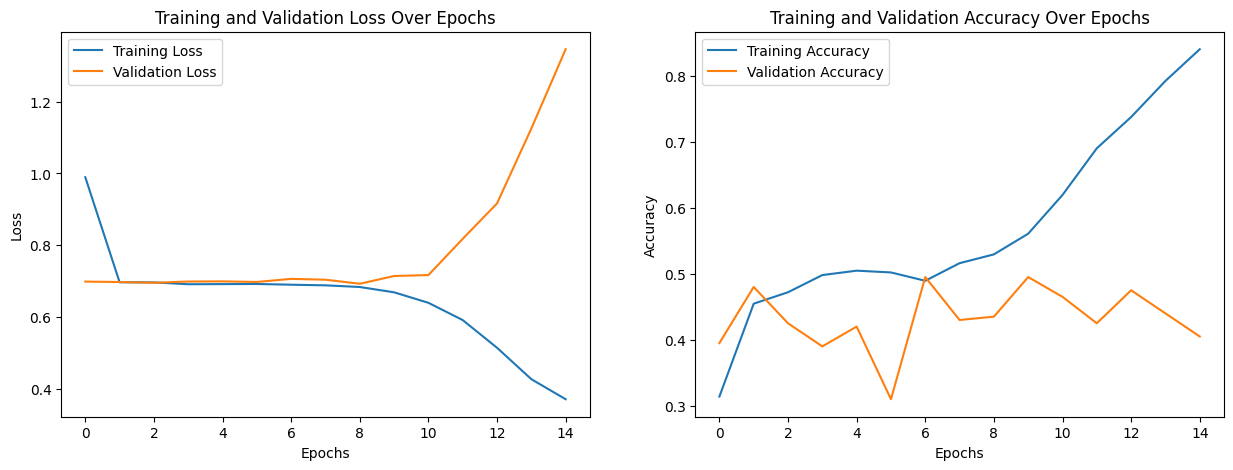

In [ ]:

# Plotting
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

['Contradiction' 'Entailment']
['Contradiction', 'Entailment', 'Entailment', 'Contradiction', 'Entailment', 'Contradiction', 'Contradiction', 'Contradiction', 'Entailment', 'Entailment', 'Entailment', 'Entailment', 'Entailment', 'Contradiction', 'Entailment', 'Contradiction', 'Entailment', 'Entailment', 'Contradiction', 'Contradiction', 'Contradiction', 'Entailment', 'Entailment', 'Contradiction', 'Entailment', 'Contradiction', 'Entailment', 'Contradiction', 'Contradiction', 'Contradiction', 'Entailment', 'Contradiction', 'Entailment', 'Contradiction', 'Contradiction', 'Entailment', 'Entailment', 'Contradiction', 'Contradiction', 'Entailment', 'Entailment', 'Contradiction', 'Contradiction', 'Contradiction', 'Entailment', 'Contradiction', 'Entailment', 'Entailment', 'Unknown', 'Contradiction', 'Entailment', 'Entailment', 'Entailment', 'Entailment', 'Contradiction', 'Contradiction', 'Entailment', 'Entailment', 'Entailment', 'Entailment', 'Contradiction', 'Entailment', 'Entailment', 'Cont

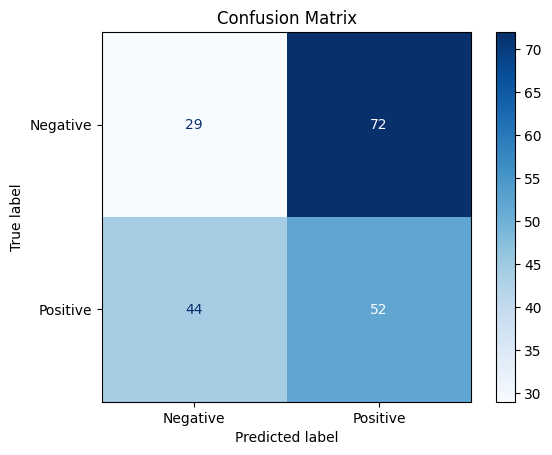

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics

# Create confusion matrix

val_labels = []
val_preds = []


for i in range(len(val_true_labels)):

  val_labels.append(map_to_labels((val_true_labels[i])))

for i in range(len(val_predicted_labels)):

  val_preds.append(map_to_labels((val_predicted_labels[i])))

unique_labels = np.unique(val_labels)
#print(unique_labels)

#print(val_preds)
#print(val_labels)

#val_predictions = map_to_labels(val_predicted_labels)
conf_matrix = metrics.confusion_matrix(val_labels, val_preds)

# Create confusion matrix
conf_matrix = confusion_matrix(val_labels, val_preds, labels=unique_labels)

# Display the confusion matrix with labels
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=['Negative', 'Positive'])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Print true and predicted labels for each sample in the validation set
for idx, (true_label, pred_label) in enumerate(zip(val_labels, val_preds), 1):
    print(f'Sample {idx}: True Label: {true_label}, Predicted Label: {pred_label}')
    print(" ")


Sample 1: True Label: Contradiction, Predicted Label: Contradiction
 
Sample 2: True Label: Entailment, Predicted Label: Entailment
 
Sample 3: True Label: Contradiction, Predicted Label: Entailment
 
Sample 4: True Label: Entailment, Predicted Label: Contradiction
 
Sample 5: True Label: Entailment, Predicted Label: Entailment
 
Sample 6: True Label: Contradiction, Predicted Label: Contradiction
 
Sample 7: True Label: Contradiction, Predicted Label: Contradiction
 
Sample 8: True Label: Contradiction, Predicted Label: Contradiction
 
Sample 9: True Label: Contradiction, Predicted Label: Entailment
 
Sample 10: True Label: Contradiction, Predicted Label: Entailment
 
Sample 11: True Label: Contradiction, Predicted Label: Entailment
 
Sample 12: True Label: Contradiction, Predicted Label: Entailment
 
Sample 13: True Label: Contradiction, Predicted Label: Entailment
 
Sample 14: True Label: Entailment, Predicted Label: Contradiction
 
Sample 15: True Label: Entailment, Predicted Label:

## **6) Testing and Testing Results**

In [ ]:
def eval(dev, Results):
    uuid_list = list(Results.keys())

    results_pred = []
    gold_labels = []

    for i in range(len(uuid_list)):
        # Assuming your model outputs class labels like 0 or 1
        results_pred.append(int(Results[uuid_list[i]]["Prediction"] == "Entailment"))

        # Assuming your ground truth labels are also class labels like 0 or 1
        gold_labels.append(int(dev[uuid_list[i]]["Label"] == "Entailment"))

    f_score = f1_score(gold_labels, results_pred)
    p_score = precision_score(gold_labels, results_pred)
    r_score = recall_score(gold_labels, results_pred)

    print('F1:{:f}'.format(f_score))
    print('precision_score:{:f}'.format(p_score))
    print('recall_score:{:f}'.format(r_score))




In [ ]:

# Applying the test set to the model
import torch
from torch.utils.data import DataLoader
#from your_dataset_module import TestDataset  # Replace with your actual dataset module

test_dataset = CustomDataset(new_test_df, tokenizer, max_length , num_classes = 2)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

# Lists to store predictions and ground truth labels
test_true_predictions = []
test_true_labels = []

# Iterate through the test set
with torch.no_grad():
    for batch in test_dataloader:
        inputs = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['label'].to(device)

        # Forward pass
        outputs = model(inputs, attention_mask)

        # Assuming your model has a softmax layer for classification
        predictions = torch.argmax(outputs, dim=1)

        # Append predictions and labels to the lists
        test_true_predictions.extend(predictions.cpu().numpy())
        test_true_labels.extend(labels.cpu().numpy())

# Compute evaluation metrics (e.g., accuracy, precision, recall, F1 score)
from sklearn.metrics import accuracy_score, classification_report
print(test_true_predictions)
accuracy = accuracy_score(test_true_labels, test_true_predictions)
report = classification_report(test_true_labels, test_true_predictions)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)

[array([0, 1]), array([0, 1]), array([0, 1]), array([1, 0]), array([0, 1]), array([0, 1]), array([0, 1]), array([1, 0]), array([1, 0]), array([1, 0]), array([0, 1]), array([0, 1]), array([1, 0]), array([0, 1]), array([1, 0]), array([1, 0]), array([0, 1]), array([0, 1]), array([0, 1]), array([0, 1]), array([0, 1]), array([1, 0]), array([1, 0]), array([0, 1]), array([0, 1]), array([0, 1]), array([0, 1]), array([1, 0]), array([1, 0]), array([0, 1]), array([0, 1]), array([1, 1]), array([1, 0]), array([1, 0]), array([0, 1]), array([0, 1]), array([1, 0]), array([0, 1]), array([1, 0]), array([0, 1]), array([1, 0]), array([0, 1]), array([1, 0]), array([0, 1]), array([0, 1]), array([1, 0]), array([0, 1]), array([0, 1]), array([1, 0]), array([0, 1]), array([0, 1]), array([0, 1]), array([0, 1]), array([0, 1]), array([0, 1]), array([0, 1]), array([0, 1]), array([1, 0]), array([0, 1]), array([1, 0]), array([0, 1]), array([0, 1]), array([1, 0]), array([0, 1]), array([1, 0]), array([0, 1]), array([0,

['Contradiction' 'Entailment']


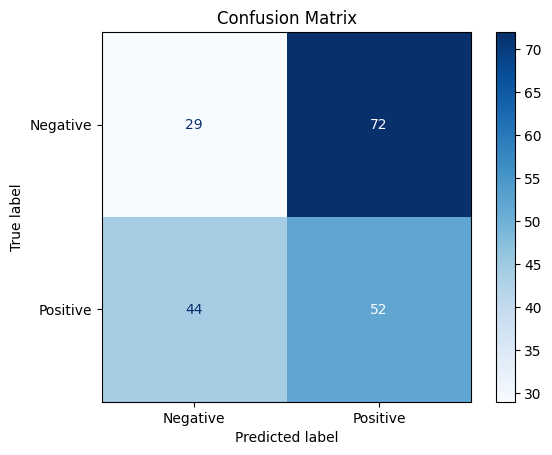

In [ ]:
test_labels = []
test_preds = []


for i in range(len(test_true_predictions)):

  test_preds.append(map_to_labels((test_true_predictions[i])))

for i in range(len(test_true_labels)):

  test_labels.append(map_to_labels((test_true_labels[i])))

unique_labels = np.unique(test_labels)
print(unique_labels)



conf_matrix = metrics.confusion_matrix(test_labels, test_preds)

# Create confusion matrix
conf_matrix = confusion_matrix(test_labels, test_preds, labels=unique_labels)

# Display the confusion matrix with labels
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=['Negative', 'Positive'])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import numpy as np


# Apply the mapping function to each array in the input_data
preds = np.array([map_to_labels(arr) for arr in all_predictions])

# Display the result
print(preds)

['Entailment' 'Contradiction' 'Entailment' 'Contradiction' 'Contradiction'
 'Entailment' 'Entailment' 'Contradiction' 'Entailment' 'Entailment'
 'Entailment' 'Contradiction' 'Entailment' 'Entailment' 'Entailment'
 'Contradiction' 'Entailment' 'Contradiction' 'Contradiction'
 'Contradiction' 'Entailment' 'Contradiction' 'Entailment' 'Entailment'
 'Contradiction' 'Entailment' 'Entailment' 'Contradiction' 'Entailment'
 'Entailment' 'Entailment' 'Entailment' 'Contradiction' 'Entailment'
 'Entailment' 'Contradiction' 'Entailment' 'Contradiction' 'Contradiction'
 'Contradiction' 'Entailment' 'Contradiction' 'Entailment' 'Entailment'
 'Contradiction' 'Entailment' 'Contradiction' 'Entailment' 'Contradiction'
 'Contradiction' 'Contradiction' 'Contradiction' 'Entailment' 'Entailment'
 'Entailment' 'Entailment' 'Entailment' 'Entailment' 'Contradiction'
 'Contradiction' 'Contradiction' 'Entailment' 'Entailment' 'Entailment'
 'Entailment' 'Unknown' 'Entailment' 'Entailment' 'Contradiction'
 'Entail

In [ ]:
all_labels[0]

array([0, 1])

In [ ]:
json_format = {}
for i in range (len(preds)):

  json_format.update({uuid_list_test[i] : {"Prediction": preds[i]}})

In [ ]:
#Submission format
json_format

{'1adc970c-d433-44d0-aa09-d3834986f7a2': {'Prediction': 'Entailment'},
 '6b9162d0-0816-46d4-81af-c60028dcc63b': {'Prediction': 'Contradiction'},
 '0b6cc8e3-69ee-4a91-b93d-2ad3fddce65f': {'Prediction': 'Entailment'},
 'cc1f712a-2116-4e40-9810-f315e3fa5ff8': {'Prediction': 'Contradiction'},
 '904061c0-14fa-4f13-9118-9a41e24fa8eb': {'Prediction': 'Contradiction'},
 '43ee7645-ce1e-42d5-9a74-3e379f6f367b': {'Prediction': 'Entailment'},
 '0cef8c8e-7986-46c7-a597-c5733a9899c0': {'Prediction': 'Entailment'},
 '43ce26e5-03fa-4e9d-b0eb-6ea356295753': {'Prediction': 'Contradiction'},
 '3facad41-0221-42f8-834d-470e65c4aad5': {'Prediction': 'Entailment'},
 '9cbc00e9-3a2d-4471-a93e-72c95132fb6a': {'Prediction': 'Entailment'},
 '8b91cab9-d858-45f3-bf8d-3d6fc55b4818': {'Prediction': 'Entailment'},
 '4a75574c-fa86-4e62-a210-81c7b98a3807': {'Prediction': 'Contradiction'},
 'd0b50aeb-aad8-4a8d-aae6-5c58a7d382c7': {'Prediction': 'Entailment'},
 'b0b61978-57db-4a1c-812c-509e8b05f2dc': {'Prediction': 'Entai

In [ ]:
#print(preds)
with open("/content/drive/MyDrive/NLP/results.json",'w') as jsonFile:
    jsonFile.write(json.dumps(json_format,indent=4))

In [ ]:
def main():

    gold = test
    results = json_format
    uuid_list = list(results.keys())

    results_pred = []
    gold_labels = []
    for i in range(len(uuid_list)):
        if results[uuid_list[i]]["Prediction"] == "Entailment":
            results_pred.append(1)
        else:
            results_pred.append(0)
        if gold[uuid_list[i]]["Label"] == "Entailment":
            gold_labels.append(1)
        else:
            gold_labels.append(0)

    f_score = f1_score(gold_labels,results_pred)
    p_score = precision_score(gold_labels,results_pred)
    r_score = recall_score(gold_labels,results_pred)

    print('F1:{:f}'.format(f_score))
    print('precision_score:{:f}'.format(p_score))
    print('recall_score:{:f}'.format(r_score))

if '__main__' == __name__:
    main()

F1:0.562500
precision_score:0.508065
recall_score:0.630000


## **END OF MAIN CODE**

In [ ]:
# top most occurant n-grams 3 for each label:
"""

from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
import nltk
nltk.download('punkt')
# Function to get top 4-word phrases for each label
def get_top_four_word_phrases(statements, top_n=10):
    four_word_phrases = Counter()

    for statement in statements:
        # Tokenize the statement
        words = word_tokenize(statement)
        # Generate 4-grams
        four_grams = ngrams(words, 4)
        # Update the counter with these 4-grams
        four_word_phrases.update(four_grams)

    return four_word_phrases.most_common(top_n)

# Extracting statements and labels from the data
statements_by_label = {}
for id, entry in data.items():
    label = entry['Label']
    statement = entry['Statement']
    if label in statements_by_label:
        statements_by_label[label].append(statement)
    else:
        statements_by_label[label] = [statement]

# Extract and store the top 4-word phrases for each label
top_phrases_by_label = {}
for label, statements in statements_by_label.items():
    top_phrases_by_label[label] = get_top_four_word_phrases(statements)

top_phrases_by_label


"""



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


{'Contradiction': [(('in', 'the', 'primary', 'trial'), 236),
  (('of', 'the', 'primary', 'trial'), 194),
  (('the', 'primary', 'trial', '.'), 191),
  (('the', 'primary', 'trial', 'and'), 106),
  (('for', 'the', 'primary', 'trial'), 105),
  (('and', 'the', 'secondary', 'trial'), 105),
  (('primary', 'trial', 'and', 'the'), 104),
  (('trial', 'and', 'the', 'secondary'), 103),
  (('the', 'secondary', 'trial', '.'), 84),
  (('1', 'of', 'the', 'primary'), 79)],
 'Entailment': [(('in', 'the', 'primary', 'trial'), 248),
  (('the', 'primary', 'trial', '.'), 219),
  (('of', 'the', 'primary', 'trial'), 189),
  (('for', 'the', 'primary', 'trial'), 101),
  (('the', 'secondary', 'trial', '.'), 85),
  (('1', 'of', 'the', 'primary'), 81),
  (('and', 'the', 'secondary', 'trial'), 75),
  (('the', 'primary', 'trial', 'and'), 74),
  (('primary', 'trial', 'and', 'the'), 72),
  (('trial', 'and', 'the', 'secondary'), 71)]}

In [ ]:
"""
# Function to get top 4-word sequential phrases for each label
def get_top_four_word_sequential_phrases(statements, top_n=10):
    four_word_phrases = Counter()

    for statement in statements:
        # Basic tokenization by splitting on whitespace
        words = statement.split()
        # Generate 4-grams in a sequential manner (i.e., considering phrases as they appear in the text)
        four_grams = [' '.join(words[i:i+4]) for i in range(len(words) - 3)]
        # Update the counter with these 4-grams
        four_word_phrases.update(four_grams)

    return four_word_phrases.most_common(top_n)

# Extract and store the top 4-word sequential phrases for each label
top_sequential_phrases_by_label = {}
for label, statements in statements_by_label.items():
    top_sequential_phrases_by_label[label] = get_top_four_word_sequential_phrases(statements)

top_sequential_phrases_by_label

"""



{'Contradiction': [('in the primary trial', 165),
  ('of the primary trial', 153),
  ('the primary trial and', 106),
  ('primary trial and the', 104),
  ('trial and the secondary', 103),
  ('1 of the primary', 79),
  ('and the secondary trial', 78),
  ('eligible for the primary', 77),
  ('cohort 1 of the', 71),
  ('for the primary trial.', 64)],
 'Entailment': [('in the primary trial', 157),
  ('of the primary trial', 152),
  ('1 of the primary', 81),
  ('the primary trial and', 74),
  ('primary trial and the', 72),
  ('trial and the secondary', 71),
  ('eligible for the primary', 70),
  ('cohort 1 of the', 67),
  ('in the primary trial.', 66),
  ('for the primary trial.', 62)]}

In [ ]:
"""
specific_stopwords = ['in', 'primary', 'secondary', 'trial','']  # stopwords

# Function to get top 4-word sequential phrases with specific stopwords
def get_top_four_word_sequential_phrases_with_stopwords(statements, top_n=10):
    four_word_phrases = Counter()

    for statement in statements:
        # Basic tokenization by splitting on whitespace and filtering out specific stopwords
        words = [word for word in statement.split() if word.lower() not in specific_stopwords]
        # Generate 4-grams in a sequential manner
        four_grams = [' '.join(words[i:i+4]) for i in range(len(words) - 3)]
        # Update the counter with these 4-grams
        four_word_phrases.update(four_grams)

    return four_word_phrases.most_common(top_n)

# Extract and store the top 4-word sequential phrases for each label with specific stopwords
top_sequential_phrases_by_label_with_stopwords = {}
for label, statements in statements_by_label.items():
    top_sequential_phrases_by_label_with_stopwords[label] = get_top_four_word_sequential_phrases_with_stopwords(statements)

top_sequential_phrases_by_label_with_stopwords

"""

{'Contradiction': [('cohort 1 of the', 71),
  ('eligible for the trial.', 54),
  ('are eligible for the', 47),
  ('the and the trial.', 40),
  ('cohort 2 of the', 29),
  ('both the and the', 27),
  ('are excluded from the', 22),
  ('excluded from the trial.', 22),
  ('be eligible for the', 22),
  ('1 of the trial.', 21)],
 'Entailment': [('cohort 1 of the', 67),
  ('eligible for the trial.', 54),
  ('are eligible for the', 45),
  ('excluded from the trial.', 35),
  ('the and the trial.', 33),
  ('are excluded from the', 31),
  ('both the and the', 27),
  ('1 of the trial.', 22),
  ('Cohort 1 of the', 22),
  ('be eligible for the', 22)]}

Here we also see the most commonly occuring 4-word phrases in statements specific to Entailment & Contradiction Labels. But the difference is that we remove some stopwards that were too common in the previous commonly occuring phrases. We come to the conclusion that the reports being written in a similar thematic way, we cannot find any different co occuring artifacts that come in the form of phrases. To keep stripping it down to smaller portions holds no advantage.

In [ ]:

"""
import pandas as pd
from collections import Counter
from nltk.util import ngrams

# Function to get top 4-word sequential phrases from a column of the dataframe
def get_top_four_word_phrases_from_df_column(df, column_name, top_n=10):
    four_word_phrases = Counter()

    # Iterating through each row in the specified column
    for statement in df[column_name].dropna():
        # Basic tokenization by splitting on whitespace
        words = statement.split()
        # Generate 4-grams in a sequential manner
        four_grams = [' '.join(words[i:i+4]) for i in range(len(words) - 3)]
        # Update the counter with these 4-grams
        four_word_phrases.update(four_grams)

    return four_word_phrases.most_common(top_n)

# Load the provided CSV file
#csv_file_path = '/mnt/data/new_train_df.csv'  # Replace with the path to your CSV file
#new_train_df = pd.read_csv(csv_file_path)

# Finding top 10 most common 4-word phrases in 'Statement', 'Primary CTR', and 'Secondary CTR' columns
top_phrases_statement = get_top_four_word_phrases_from_df_column(new_train_df, 'Statement')
top_phrases_primary_ctr = get_top_four_word_phrases_from_df_column(new_train_df, 'Primary CTR')
top_phrases_secondary_ctr = get_top_four_word_phrases_from_df_column(new_train_df, 'Secondary CTR')

# Display the results
print("Top Phrases in 'Statement' Column:")
print(top_phrases_statement)
print("\nTop Phrases in 'Primary CTR' Column:")
print(top_phrases_primary_ctr)
print("\nTop Phrases in 'Secondary CTR' Column:")
print(top_phrases_secondary_ctr)

"""

Top Phrases in 'Statement' Column:
[('in the primary trial', 282), ('of the primary trial', 274), ('the primary trial and', 156), ('primary trial and the', 153), ('trial and the secondary', 151), ('1 of the primary', 141), ('eligible for the primary', 137), ('cohort 1 of the', 120), ('and the secondary trial', 118), ('for the primary trial.', 114)]

Top Phrases in 'Primary CTR' Column:
[('Overall Number of Participants', 492), ('Number of Participants Analyzed:', 492), ('Adverse Events 1: Total:', 438), ('Results 1: Arm/Group Title:', 284), ('Adverse Events 2: Total:', 246), ('Measure Type: Number Unit', 243), ('Type: Number Unit of', 243), ('Number Unit of Measure:', 243), ('Results 2: Arm/Group Title:', 208), ('upper limit of normal', 142)]

Top Phrases in 'Secondary CTR' Column:
[('Adverse Events 1: Total:', 171), ('Overall Number of Participants', 101), ('Number of Participants Analyzed:', 101), ('Adverse Events 2: Total:', 62), ('Results 1: Arm/Group Title:', 60), ('Measure Type: 

In [ ]:
"""

# Creating a DataFrame to display the results in a table format
top_phrases_df = pd.DataFrame({
    'Top Phrases in Statement': [f"'{' '.join(phrase)}', {count}" for phrase, count in top_phrases_statement],
    'Top Phrases in Primary CTR': [f"'{' '.join(phrase)}', {count}" for phrase, count in top_phrases_primary_ctr],
    'Top Phrases in Secondary CTR': [f"'{' '.join(phrase)}', {count}" for phrase, count in top_phrases_secondary_ctr]
})

top_phrases_df

"""

,Top Phrases in Statement,Top Phrases in Primary CTR,Top Phrases in Secondary CTR
0,"'i n t h e p r i m a r y t r i a l', 282",'O v e r a l l N u m b e r o f P a r t i...,'A d v e r s e E v e n t s 1 : T o t a l...
1,"'o f t h e p r i m a r y t r i a l', 274",'N u m b e r o f P a r t i c i p a n t s ...,'O v e r a l l N u m b e r o f P a r t i...
2,"'t h e p r i m a r y t r i a l a n d', 156",'A d v e r s e E v e n t s 1 : T o t a l...,'N u m b e r o f P a r t i c i p a n t s ...
3,"'p r i m a r y t r i a l a n d t h e', 153",'R e s u l t s 1 : A r m / G r o u p T i...,'A d v e r s e E v e n t s 2 : T o t a l...
4,'t r i a l a n d t h e s e c o n d a r y...,'A d v e r s e E v e n t s 2 : T o t a l...,'R e s u l t s 1 : A r m / G r o u p T i...
5,"'1 o f t h e p r i m a r y', 141",'M e a s u r e T y p e : N u m b e r U n...,'M e a s u r e T y p e : N u m b e r U n...
6,'e l i g i b l e f o r t h e p r i m a r...,"'T y p e : N u m b e r U n i t o f', 243","'T y p e : N u m b e r U n i t o f', 46"
7,"'c o h o r t 1 o f t h e', 120",'N u m b e r U n i t o f M e a s u r e :...,'N u m b e r U n i t o f M e a s u r e :...
8,'a n d t h e s e c o n d a r y t r i a l...,'R e s u l t s 2 : A r m / G r o u p T i...,'R e s u l t s 2 : A r m / G r o u p T i...
9,"'f o r t h e p r i m a r y t r i a l .',...","'u p p e r l i m i t o f n o r m a l', 142","'u p p e r l i m i t o f n o r m a l', 41"


Comparing these results, we observe that the most common phrases in the 'Statement' column are primarily related to trial descriptions (e.g., 'in the primary trial', 'of the primary trial'), whereas in the 'Primary CTR' and 'Secondary CTR' columns, the phrases are more related to structured clinical trial data (e.g., 'Adverse Events 1: Total:', 'Overall Number of Participants'). There is no overlap in the top 10 phrases between the 'Statement' column and the 'Primary CTR'/'Secondary CTR' columns, indicating distinct thematic focuses in these columns.